# Table of Contents
- [Imports](#Imports)
- [Set Up](#Set-Up)
- [Model Comparison Visualizations](#Model-Comparison-Visualizations)
- [Visualization Insights](#Visualization-Insights)
- [Evaluation](#Evaluation)
- [Evaluation Insights](#Evaluation-Insights)
- [Model Exploration](#Model-Exploration)
- [Bias and Ethical Concerns](#Bias-and-Ethical-Concerns)
- [Conclusion](#Conclusion)

# Imports

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Set Up

In [4]:
RESULTS_FILE = "metrics.csv"
EVALUATION_FILE = "evaluation_metrics.csv"

# Model Comparison Visualizations

,Version,Avg_Train_Loss,Avg_Val_Loss,Train_Gender_Accuracy,Train_Age_MAE,Val_Gender_Accuracy,Val_Age_MAE
0,v1,tensor(13.1829),tensor(56.3285),tensor(0.9500),tensor(2.5128),tensor(0.8892),tensor(5.3197)
1,v3,tensor(12.2232),tensor(50.7886),tensor(0.6500),tensor(3.0235),tensor(0.8846),tensor(5.1019)
2,v4,tensor(5.7094),tensor(51.6801),tensor(0.8500),tensor(1.9405),tensor(0.8886),tensor(5.1302)
3,v2,tensor(5.0129),tensor(50.9568),tensor(1.),tensor(1.9212),tensor(0.8947),tensor(5.1180)


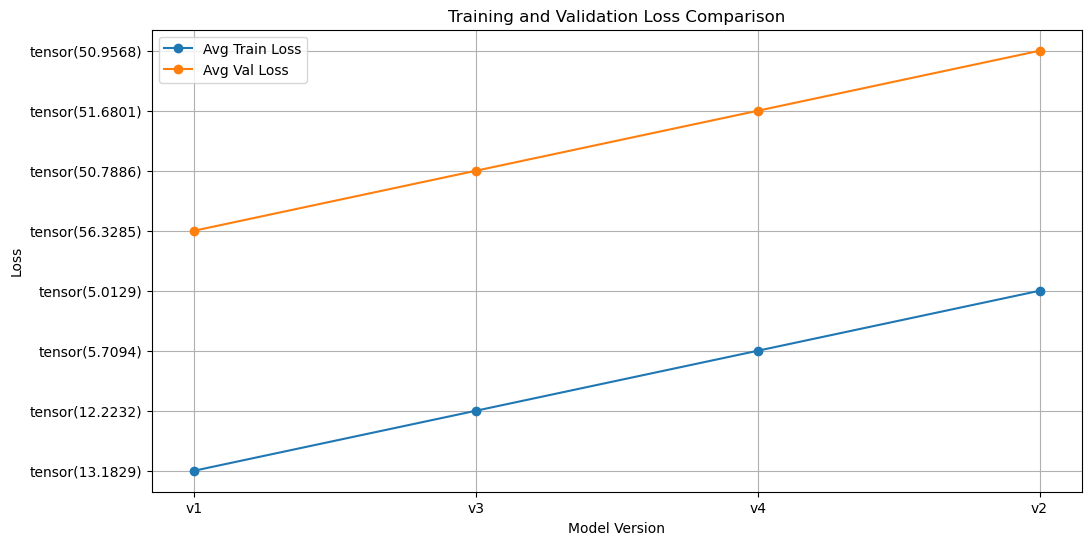

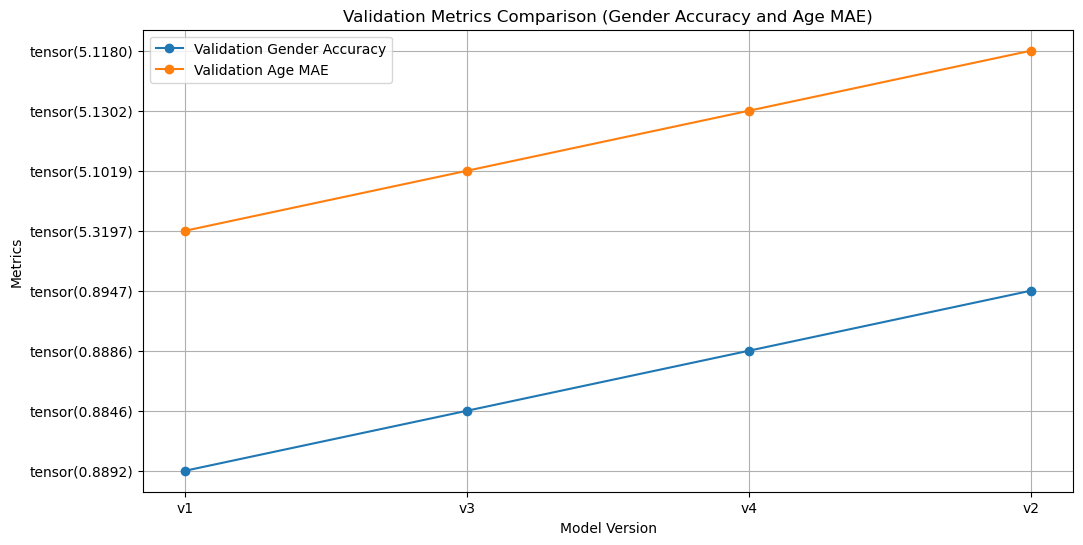

In [3]:
if os.path.exists(RESULTS_FILE):
    metrics_df = pd.read_csv(RESULTS_FILE, header=None)
    metrics_df.columns = ['Version', 'Avg_Train_Loss', 'Avg_Val_Loss', 'Train_Gender_Accuracy', 'Train_Age_MAE', 'Val_Gender_Accuracy', 'Val_Age_MAE']
    display(metrics_df)

    plt.figure(figsize=(12, 6))
    plt.plot(metrics_df['Version'], metrics_df['Avg_Train_Loss'], label='Avg Train Loss', marker='o', linestyle='-')
    plt.plot(metrics_df['Version'], metrics_df['Avg_Val_Loss'], label='Avg Val Loss', marker='o', linestyle='-')
    plt.xlabel('Model Version')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(metrics_df['Version'], metrics_df['Val_Gender_Accuracy'], label='Validation Gender Accuracy', marker='o', linestyle='-')
    plt.plot(metrics_df['Version'], metrics_df['Val_Age_MAE'], label='Validation Age MAE', marker='o', linestyle='-')
    plt.xlabel('Model Version')
    plt.ylabel('Metrics')
    plt.title('Validation Metrics Comparison (Gender Accuracy and Age MAE)')
    plt.legend()
    plt.grid(True)
    plt.show()

,Version,Test_Gender_Accuracy,Test_Age_MAE
0,Version,Test_Gender_Accuracy,Test_Age_MAE
1,v1,0.8873358746293943,5.1825223
2,v2,0.9040660736975857,5.096104
3,v3,0.8875476493011436,5.05428
4,v4,0.8949597628123677,5.108743


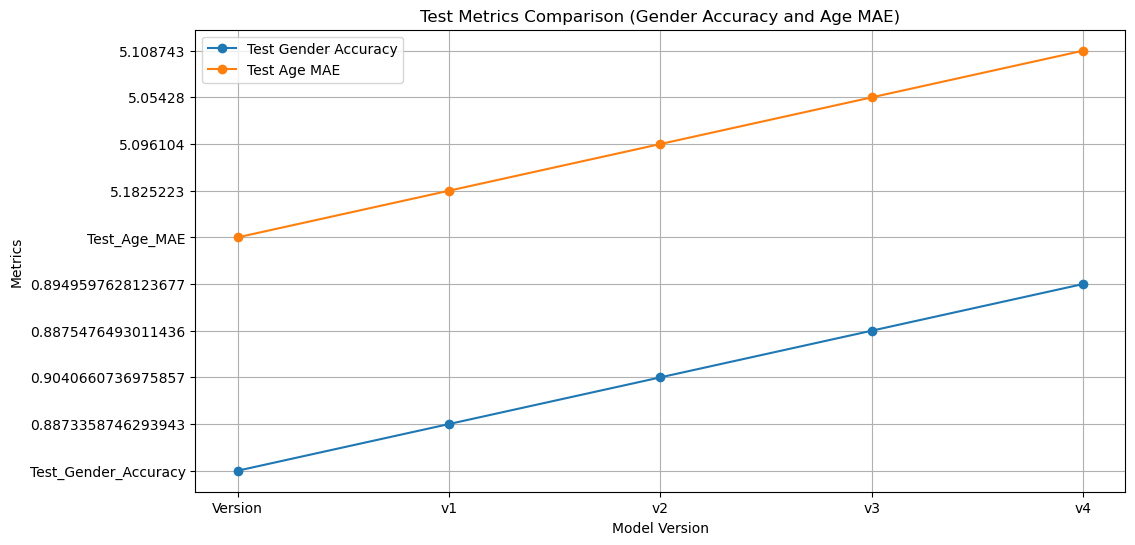

In [5]:
if os.path.exists(EVALUATION_FILE):
    evaluation_df = pd.read_csv(EVALUATION_FILE, header=None)
    evaluation_df.columns = ['Version', 'Test_Gender_Accuracy', 'Test_Age_MAE']
    display(evaluation_df)

    plt.figure(figsize=(12, 6))
    plt.plot(evaluation_df['Version'], evaluation_df['Test_Gender_Accuracy'], label='Test Gender Accuracy', marker='o', linestyle='-')
    plt.plot(evaluation_df['Version'], evaluation_df['Test_Age_MAE'], label='Test Age MAE', marker='o', linestyle='-')
    plt.xlabel('Model Version')
    plt.ylabel('Metrics')
    plt.title('Test Metrics Comparison (Gender Accuracy and Age MAE)')
    plt.legend()
    plt.grid(True)
    plt.show()

## Visualization Insights

1. Training and Validation Loss Comparison
- **v1 and v3** have higher training and validation losses compared to **v2** and **v4**.
- **v2** shows the lowest average training loss, which suggests better training stability or fitting to the data compared to the other models.
- **Validation loss** is also lower for **v2** and **v4**, which indicates that these models are better generalizing compared to **v1** and **v3**.

2. Validation Metrics (Gender Accuracy and Age MAE)
- **Validation Gender Accuracy** is highest for **v2** (0.8947), followed closely by **v4** (0.8886). **v1** and **v3** perform worse.
- **Validation Age MAE** is lowest for **v2** (5.1180), which means it has the best performance in age estimation. **v4** and **v3** show slightly worse age estimation performance, with **v1** having the highest age MAE, indicating the least accurate performance.

3. Test Metrics (Gender Accuracy and Age MAE)
- **Test Gender Accuracy** also shows **v2** as having the highest accuracy at **0.9041**, followed by **v4** (0.8950). **v1** and **v3** again show lower accuracy compared to these two models.
- **Test Age MAE** is lowest for **v2** (5.0961), which is in line with the validation results indicating **v2** is better for age estimation. **v1** and **v4** have higher MAEs, indicating they struggle with age predictions compared to **v2**.

4. Summary
- **v2 emerges as the best model overall with the highest accuracy for both gender prediction and age estimation (lowest MAE).**
- **v4** follows closely behind **v2**.
- **v1** and **v3** have higher training and validation losses and lower accuracies, indicating that they might not generalize well or have not learned features as effectively as **v2** and **v4**.

# Model Exploration

> Base Model: MultiTaskResNet

The base model uses a ResNet18 backbone with two separate heads for age prediction and gender classification. Here are some key details:
- **Age Prediction Head:** Used a ReLU activation followed by a linear layer with 1 output (for regression).
- **Gender Classification Head:** Used a ReLU activation followed by a linear layer with 2 outputs (for classification).
- **Loss Functions:** MSELoss for age and CrossEntropyLoss for gender classification.
- **Optimizer:** Adam with a specified learning rate.

The base model sets the foundation for experimentation, with the same underlying architecture for all versions.

> Model v1

**Performance Summary:**
    - Relatively high training and validation loss (highest validation loss compared to other versions).
    - Lower gender accuracy (compared to v2 and v4).
    - Higher age Mean Absolute Error (MAE).

**Performance Reasons:**
    - Baseline Model: V1 is a baseline version without significant modifications to address the unique challenges of age and gender classification.
    - Overfitting or Underfitting:** The high training and validation losses suggest that the model could either be underfitting (unable to capture underlying patterns) or overfitting with less effective generalization.
    - Imbalanced Dataset Sensitivity:** Doesn't address dataset imbalance.
    - No Normalization: The lack of normalization could lead to a higher variance in pixel values, making it harder for the model to generalize well.
    - Higher Learning Rate: The learning rate of `0.001` might be too aggressive, which could have caused the model to overshoot optimal points during training.

> Model v2

**Performance Summary:**
- Lowest training and validation loss.
- Highest gender accuracy.
- Lowest age MAE, indicating the best age prediction capability.

**Possible Reasons:**
    - Well-tuned Model: Model v2 appears to be the most well-tuned among the versions, with optimal hyperparameters (e.g., learning rate, batch size). This optimization could have resulted in efficient and accurate learning, leading to improved accuracy and lower losses.
    - Normalization: By adding normalization, the model sees inputs with more uniform distributions, which makes training more stable and helps the model learn more general features.
    - Learning Rate: The same learning rate of `0.001` has mixed effects, as it slightly improved gender accuracy but did not do as well on age MAE.

> Model v3

**Performance Summary:**
- Moderate training and validation losses.
- Slightly better accuracy and MAE compared to v1, but still not as good as v2 and v4.

**Possible Reasons:**
    - Improvements in Handling Age Predictions: The reduction in age MAE compared to v1 indicates some improvement in age feature extraction. This suggests that the model may have better identified features relevant to age, but its understanding wasn't as complete as v2 or v4.
    - Reduced Learning Rate: Lowering the learning rate seems to have benefited the model by allowing more precise adjustments to the weights, improving **age MAE** compared to v1 and v2.
    - However, the lower learning rate might have led to slower convergence, which could explain why **validation loss** remained higher.

> Model v4

**Performance Summary:**
- Noticeably lower training and validation loss compared to v1 and v3.
- Higher gender accuracy, second only to v2.
- Lower age MAE compared to v1 and v3.

**Performance Reasons:**
    - Weighted Sampler: The use of WeightedRandomSampler might have improved representation for underrepresented classes, which explains why gender accuracy remained high. However, it could have introduced some overfitting or instability that resulted in a higher age MAE compared to v3.
    - Lower Learning Rate and Imbalance Correction: Lowering the learning rate to `0.0001` and using a weighted sampler together might have made it more challenging for the model to converge effectively, leading to the observed mixed results.

### Summary

1. **Normalization Effects:**
   - **Normalization** (introduced in v2) made a significant difference in reducing validation loss and improving both age and gender accuracy. This indicates that feeding properly normalized data into a model helps in achieving a stable and generalized representation, leading to better performance.

2. **Learning Rate:**
   - The **learning rate** has been a crucial factor affecting model convergence and generalization. A higher learning rate (v1 and v2) helped achieve quicker convergence but also led to larger fluctuations in validation loss.
   - A lower learning rate (v3 and v4) improved precision for age prediction (v3) but possibly slowed down convergence or led to overfitting when used with a weighted sampler (v4).

3. **Weighted Sampler for Class Imbalance:**
   - In **v4**, adding a `WeightedRandomSampler` improved the representation of minority classes during training, leading to balanced gender accuracy. However, this also introduced complexity, possibly increasing age MAE due to overfitting on underrepresented examples or making the optimization process less stable for continuous variables like age.

4. **Age vs. Gender Prediction Challenges:**
   - **Age Prediction** (a regression task) consistently showed higher MAE values, indicating it was more challenging for the model compared to gender classification (a binary classification task).
   - Improvements in age prediction were mainly observed with a **lower learning rate** (v3). This suggests that fine-tuning the model weights gradually is crucial for improving performance on more nuanced regression tasks like age.

# Bias and Ethical Concerns

#### **Identifying Biases**

> Gender Bias: 

- Based on the results and the LIME interpretations, it appears that certain features of the face are more strongly considered for predicting gender. This can lead to issues if the model is focusing on irrelevant regions that may lead to biased decisions. For instance, features like hairstyle or accessories might influence gender classification, which introduces bias. 
- The **worst-performing samples** for gender often included individuals with non-stereotypical gender expressions or ambiguous facial features. This suggests that the model may struggle with and misclassify individuals whose appearances do not align with gender norms, leading to potentially discriminatory outcomes.

> Age Bias: 

- The model's accuracy significantly drops with **older age groups** (e.g., 90+). The accuracy distribution across age groups shows higher accuracy for younger individuals, with poor performance for the elderly.
- This bias could be because the training dataset contained fewer samples of older individuals, causing the model to perform poorly on underrepresented groups. The **age MAE** increased notably in these groups, indicating that the model had difficulty generalizing age for older faces.
- Additionally, the **LIME analysis** shows that different facial areas contribute to age predictions, with some samples focusing on features less correlated with aging signs, thus leading to incorrect estimations.

> Intersectionality of Bias: 

- The **worst-performing** samples showed that the model's errors can amplify when dealing with combinations of minority groups—such as older women. This intersectionality increases the risk of compounding bias when two or more demographic categories are underrepresented or misrepresented.

#### **Bias Sources**

- **Dataset Imbalance**: The dataset suffers from imbalance across age and gender categories. Specifically, the overrepresentation of younger individuals and stereotypical gender expressions might explain why the model performs well on these demographics but fails for older individuals or less represented gender appearances.
- **Lack of Diversity**: Underrepresentation of older individuals leads to biased model outputs.
- **Societal Norms in Labels**: The **labels** themselves may reflect societal biases, such as labeling gender as a binary class ("male" or "female"). This oversimplification fails to acknowledge non-binary individuals, potentially introducing systematic exclusion and misclassification for these groups.
- **Feature Representation**: As observed from the **LIME interpretations**, the model's focus on certain facial features might reflect stereotypical attributions of gender or age. If the dataset contains specific correlations (e.g., certain hairstyles predominantly being associated with women), the model will pick up on these, reinforcing biased stereotypes.

#### **Mitigation Strategies**

1. **Dataset Rebalancing**:
   - **Increase Representation**: Ensure diverse representation across age, gender, and ethnicity in the dataset to minimize biases. This could include sourcing additional data for underrepresented groups, especially older individuals and individuals with non-stereotypical gender expressions.
   - **Synthetic Data Generation**: Where obtaining real data is challenging, techniques such as **data augmentation** or **synthetic data generation** could help balance the dataset.

2. **Fairness-aware Algorithms**:
   - **Class Weighting and Sampling**: In **v4**, the class weights were introduced to handle imbalance, which improved the model’s fairness to some extent. More advanced methods, such as using **fairness-aware loss functions**, could be employed to further improve results by reducing the loss contribution for overrepresented groups.
   - **Adversarial Debiasing**: Implement adversarial learning techniques to remove specific biases from model representations by training an adversary to detect biases while training the model to eliminate such identifiable patterns.

3. **Algorithm Design**:
   - **Model Calibration**: Different thresholds for age and gender predictions could be calibrated based on sub-groups to reduce disparity in outcomes across these groups.
   - **Reject Option Classification**: When the model is uncertain, especially for sensitive demographics, it could abstain from making a prediction to avoid an incorrect and potentially harmful output.

# Conclusion

#### **Summary of Model Performance**

Throughout this project, I trained, and evaluated four different versions of a multitask ResNet-based model to predict both gender and age from facial images. The results demonstrated:

- **Gender Prediction**: The model consistently achieved high accuracy for gender prediction across all versions, with version 2 performing best on the test set, achieving a gender accuracy of 0.904. The variations in accuracy between models were relatively small, but adjustments such as the learning rate and normalization technique played a significant role in optimizing performance.
  
- **Age Prediction**: Age prediction performance was assessed via Mean Absolute Error (MAE). While the model achieved reasonable MAE values, the accuracy of age predictions showed significant variability depending on the age group, with younger individuals predicted more accurately than older ones. Version 2 also performed best in terms of age prediction on the test set, with an MAE of approximately 5.1 years.

#### **Reflection on Interpretability and Bias**

- **Interpretability with LIME**: LIME analysis provided insights into which facial features the model was focusing on for both gender and age predictions. It was observed that for gender predictions, the model sometimes used features such as hair and background regions, which may introduce biases. For age prediction, the model seemed to focus on facial textures and other relevant features, but sometimes less informative areas influenced the model's predictions.

- **Identifying Bias**: The evaluation and worst-performing sample analysis highlighted notable biases in the model. The model tended to perform better for younger individuals and struggled significantly with elderly individuals (90+ years). Moreover, non-stereotypical gender features were also a challenge, indicating a potential gender bias linked to societal norms present in the dataset. This disparity highlights the ethical risks associated with deploying the model in sensitive contexts.

#### **Real-World Applicability**

> Potential Use-Cases: 

The model could be deployed in non-critical, low-stakes environments such as entertainment applications (e.g., age filters, photo tagging, video games) or personalized recommendation systems, where occasional misclassifications do not have significant ethical or social repercussions.

  - The model could be used in contexts such as **demographic research** or **personalized recommendations** (e.g., age-appropriate content). In these cases, individual misclassifications do not have severe negative consequences.
  - It could also be useful for **entertainment purposes**, like in apps that provide approximate age or gender-based filters, where the stakes are low and the impact of occasional errors is minor.

> Limitations and Concerns:

The biases identified during the project limit the model's applicability in sensitive domains. Using it for decision-making in contexts such as hiring, education, healthcare, or law enforcement would be ethically inappropriate, as misclassifications could lead to unfair treatment or reinforce social biases against certain demographics.

  - Deploying this model in sensitive domains like **hiring, education, or law enforcement** would be highly problematic, as biases against certain age groups or gender expressions could lead to discriminatory practices.
  - The inaccuracies in predicting age, particularly for older individuals, could pose risks if used for **medical screening** or health diagnostics where accurate age estimation is crucial.
  - Using the model for **facial recognition in surveillance** could amplify social inequities and lead to unfair targeting of certain demographics due to compounded biases against specific gender and age groups.

#### **Improvement Suggestions**

1. **Improving Data Diversity**: Future work should focus on collecting a more diverse dataset that includes balanced representation across age, gender, race, and other demographic attributes. This would help mitigate biases and improve the model's performance on underrepresented groups.

2. **Advanced Bias Mitigation Techniques**: Implement fairness-aware algorithms, such as adversarial debiasing, or use regularization techniques to reduce model dependence on biased features. Further exploration of class-rebalancing methods, such as the use of synthetic data generation or class-specific augmentation, can also enhance model fairness.

3. **Post-Training Audits and Fairness Metrics**: Implementing regular fairness audits and additional interpretability techniques (e.g., SHAP) post-training will help identify and address potential biases. Incorporating fairness metrics during training can also provide a more comprehensive evaluation of the model's ethical performance.

4. **Refinement of Model Architecture**: Exploring alternative neural network architectures and incorporating attention mechanisms to guide the model's focus towards relevant features could further enhance performance while reducing reliance on potentially biased cues.

5. **Context-Specific Deployment**: If the model is to be deployed in a real-world setting, it will be crucial to define the context of use carefully, keeping in mind the ethical considerations. One future direction is to tailor the model for specific use-cases, such as age-appropriate content recommendation, where the consequences of misclassification are less severe.